In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Establishing a connection to your MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Rajeshgr123!',
    database='vehdb'
)

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\1776625450.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


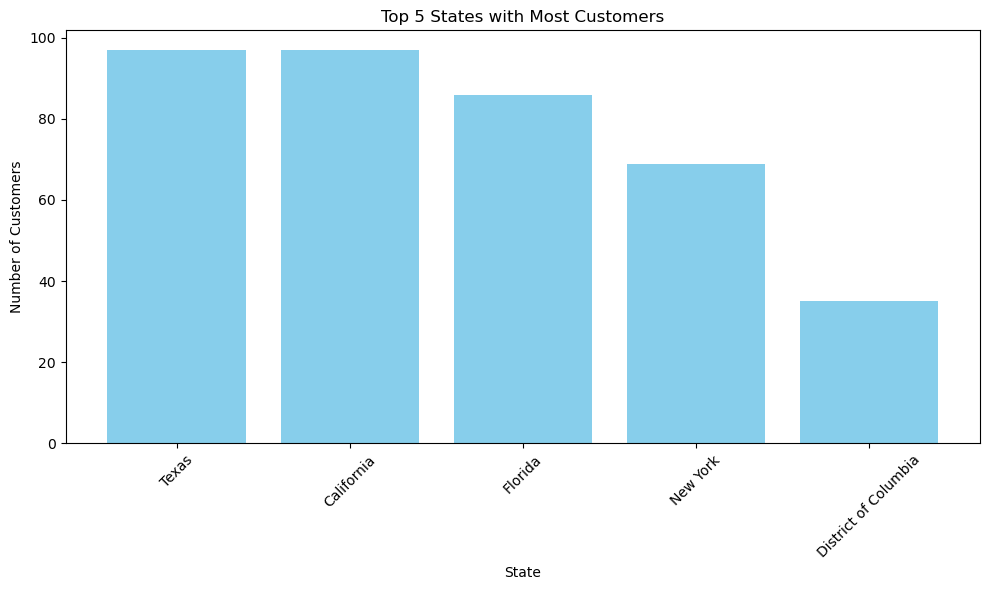

In [2]:
# SQL query to get the count of customers for each state
sql_query = """
    SELECT
        State,
        COUNT(DISTINCT Customer_id) AS CustomerCount
    FROM
        Customer_t
    GROUP BY
        State
    ORDER BY
        CustomerCount DESC
    LIMIT 5;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['State'], df['CustomerCount'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 5 States with Most Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\2057437185.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


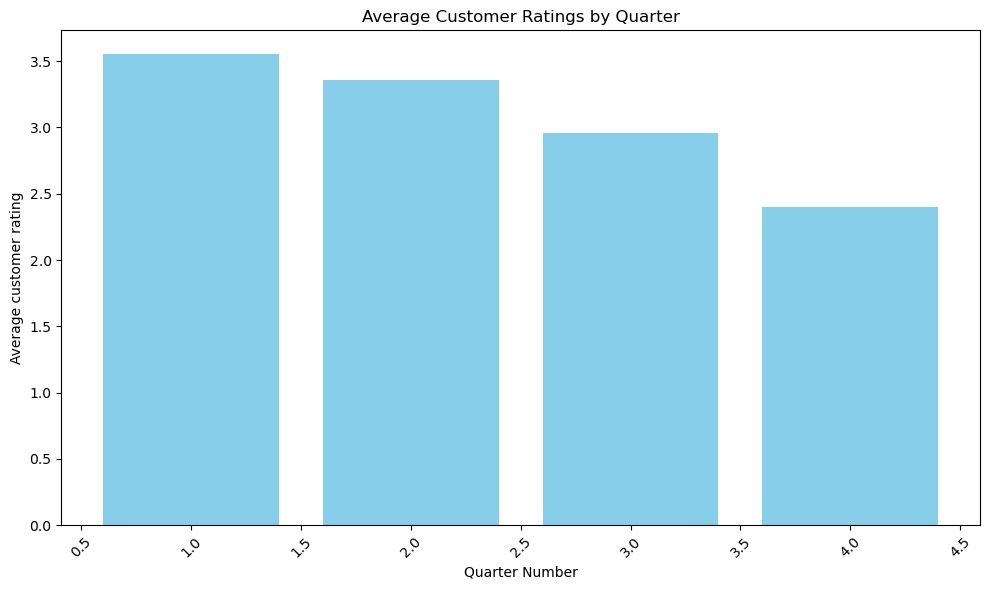

In [3]:
# SQL query to Average Customer Ratings by Quarter
sql_query = """
WITH RatingNumbers AS (
    SELECT
        Customer_feedback,
        CASE
            WHEN Customer_feedback = 'Very Bad' THEN 1
            WHEN Customer_feedback = 'Bad' THEN 2
            WHEN Customer_feedback = 'Okay' THEN 3
            WHEN Customer_feedback = 'Good' THEN 4
            WHEN Customer_feedback = 'Very Good' THEN 5
            ELSE 0  -- You can handle other cases as needed
        END AS RatingValue,
        QUARTER(Order_date) AS Quarter
    FROM
        Order_t
)
SELECT
    Quarter,
    AVG(RatingValue) AS AverageRating
FROM
    RatingNumbers
GROUP BY
    Quarter
ORDER BY
    Quarter;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Quarter'], df['AverageRating'], color='skyblue')
plt.xlabel('Quarter Number')
plt.ylabel('Average customer rating')
plt.title('Average Customer Ratings by Quarter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\2675962671.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


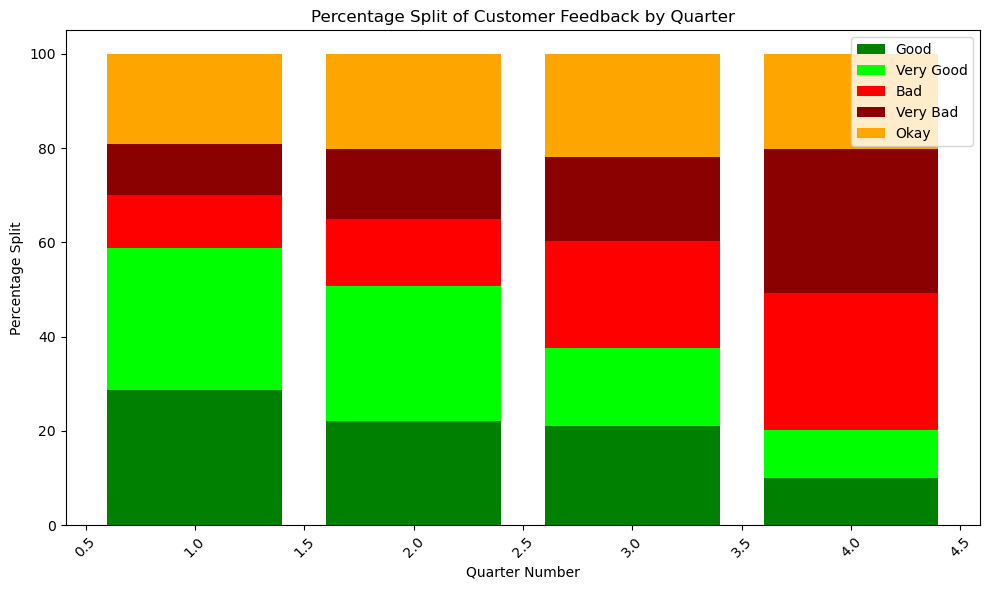

In [4]:
# SQL query to retrieve trend of Customer Satisfaction
sql_query = """
    SELECT
        Quarter(Order_Date) AS Quarter,
        SUM(CASE WHEN customer_feedback = 'Very Good' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS VeryGood,
        SUM(CASE WHEN customer_feedback = 'Good' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS Good,
        SUM(CASE WHEN customer_feedback = 'Okay' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS Okay,
        SUM(CASE WHEN customer_feedback = 'Bad' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS Bad,
        SUM(CASE WHEN customer_feedback = 'Very Bad' THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS VeryBad
    FROM
        order_t
    GROUP BY
        Quarter
    ORDER BY
        Quarter;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Creating the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Quarter'], df['Good'], color='green', label='Good')
plt.bar(df['Quarter'], df['VeryGood'], color='lime', label='Very Good', bottom=df['Good'])
plt.bar(df['Quarter'], df['Bad'], color='red', label='Bad', bottom=df['Good'] + df['VeryGood'])
plt.bar(df['Quarter'], df['VeryBad'], color='darkred', label='Very Bad', bottom=df['Good'] + df['VeryGood'] + df['Bad'])
plt.bar(df['Quarter'], df['Okay'], color='orange', label='Okay', bottom=df['Good'] + df['VeryGood'] + df['Bad'] + df['VeryBad'])

plt.xlabel('Quarter Number')
plt.ylabel('Percentage Split')
plt.title('Percentage Split of Customer Feedback by Quarter')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\2286776057.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


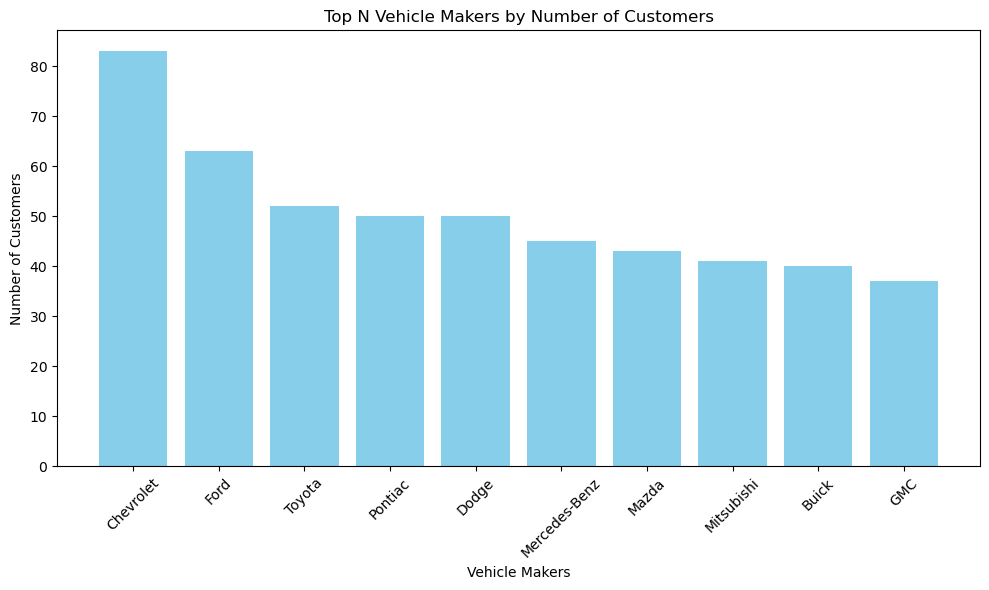

In [5]:
# SQL query to retrieve the count of customers for each vehicle maker
sql_query = """
    SELECT
        Vehicle_maker,
        COUNT(DISTINCT Product_id) AS ProductCount
    FROM
        Product_t
    GROUP BY
        Vehicle_maker
    ORDER BY
        ProductCount DESC
    LIMIT 10;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Vehicle_maker'], df['ProductCount'], color='skyblue')
plt.xlabel('Vehicle Makers')
plt.ylabel('Number of Customers')
plt.title('Top N Vehicle Makers by Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\91338181.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


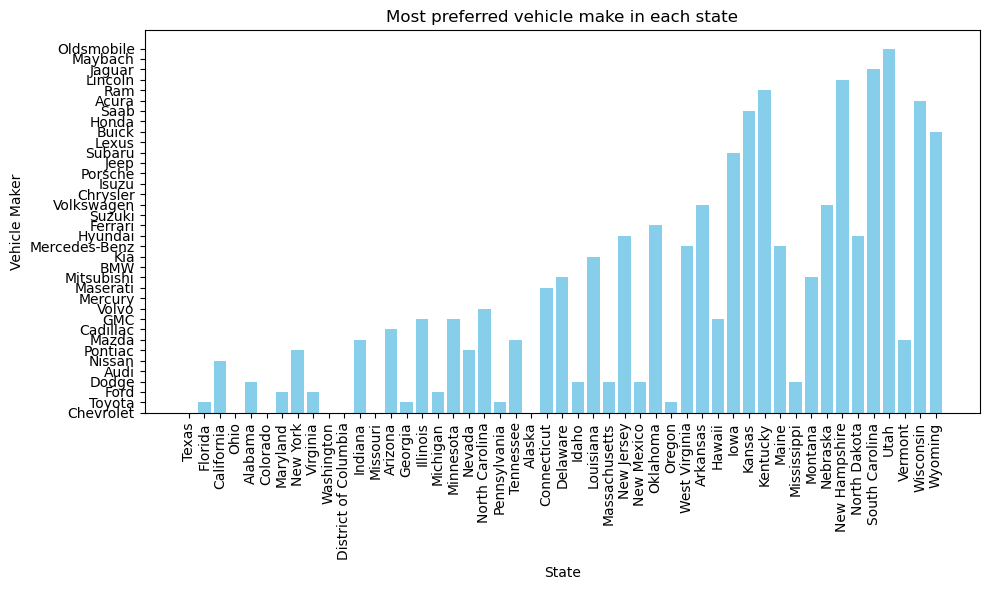

In [6]:
# SQL query to find the most preferred vehicle make in each state
sql_query = """
    SELECT * FROM (
        SELECT 
            state, 
            vehicle_maker,
            COUNT(customer_id) AS total_customers,
        RANK() OVER (PARTITION BY state ORDER BY COUNT(customer_id) DESC) AS ranking
        FROM 
            product_t 
        JOIN order_t USING(product_id)
        JOIN customer_t USING(customer_id)
        GROUP BY 
            state, 
            vehicle_maker 
    ) AS preferred_vehicle
    WHERE 
        ranking = 1
    ORDER BY 
        total_customers DESC;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Using pandas to get the top vehicle make for each state
result_df = df.groupby('state').first().reset_index()[['state', 'vehicle_maker']]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['state'], df['vehicle_maker'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Vehicle Maker')
plt.title('Most preferred vehicle make in each state')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
head = ["State", "Vehicle Maker"]
print(tabulate(result_df, headers=head, tablefmt="grid"))

+----+----------------------+-----------------+
|    | State                | Vehicle Maker   |
+====+======================+=================+
|  0 | Alabama              | Dodge           |
+----+----------------------+-----------------+
|  1 | Alaska               | Chevrolet       |
+----+----------------------+-----------------+
|  2 | Arizona              | Pontiac         |
+----+----------------------+-----------------+
|  3 | Arkansas             | Suzuki          |
+----+----------------------+-----------------+
|  4 | California           | Ford            |
+----+----------------------+-----------------+
|  5 | Colorado             | Chevrolet       |
+----+----------------------+-----------------+
|  6 | Connecticut          | Chevrolet       |
+----+----------------------+-----------------+
|  7 | Delaware             | Mitsubishi      |
+----+----------------------+-----------------+
|  8 | District of Columbia | Chevrolet       |
+----+----------------------+-----------

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\3820156924.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


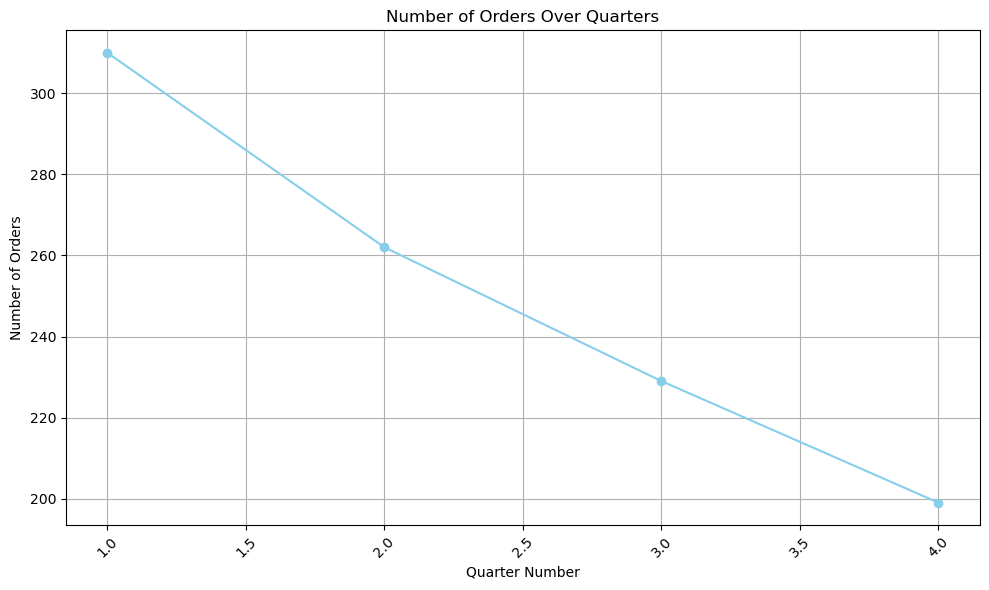

In [8]:
# SQL query to retrieve the number of orders by quarter
sql_query = """
    SELECT
        Quarter(Order_Date) AS Quarter,
        COUNT(Order_id) AS OrderCount
    FROM
        Order_t
    GROUP BY
        Quarter(Order_Date)
    ORDER BY
        Quarter;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Quarter'], df['OrderCount'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Quarter Number')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Over Quarters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\552064011.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


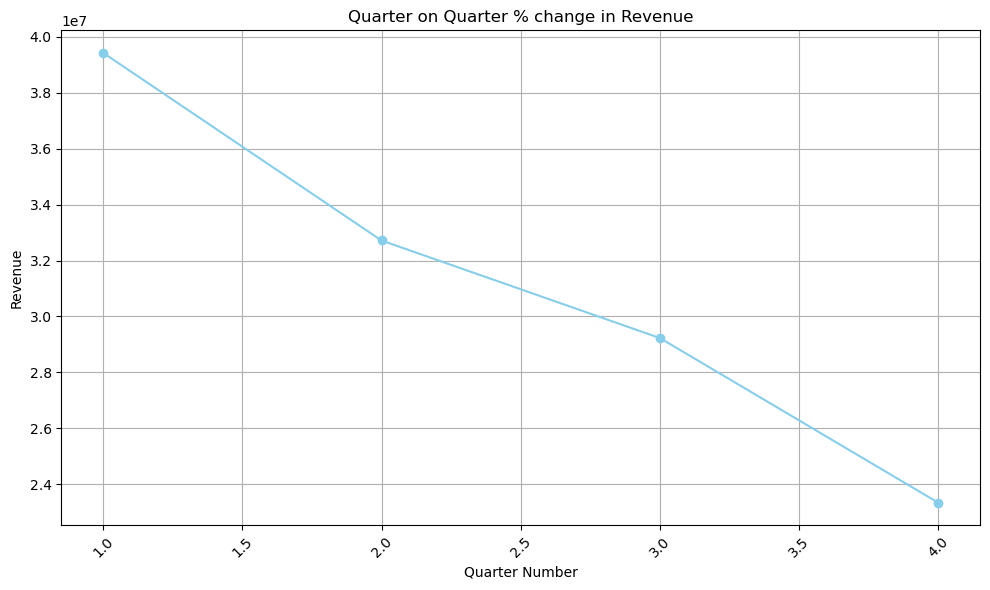

In [9]:
# SQL query to retrieve Quarter on Quarter % change in Revenue
sql_query = """
WITH QoQ AS 
(
    SELECT 
        quarter_number, 
        ROUND(SUM(quantity * (vehicle_price - ((discount / 100) * vehicle_price))), 0) AS revenue
    FROM 
        order_t
    GROUP BY 
        quarter_number)

SELECT 
    quarter_number, 
    revenue,
    ROUND(LAG(revenue) OVER(ORDER BY quarter_number), 2) AS previous_revenue,
    ROUND((revenue - LAG(revenue) OVER(ORDER BY quarter_number))/LAG(revenue) OVER(ORDER BY quarter_number), 2) AS qoq_perc_change
FROM QoQ;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['quarter_number'], df['revenue'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Quarter Number')
plt.ylabel('Revenue')
plt.title('Quarter on Quarter % change in Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\1598972944.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


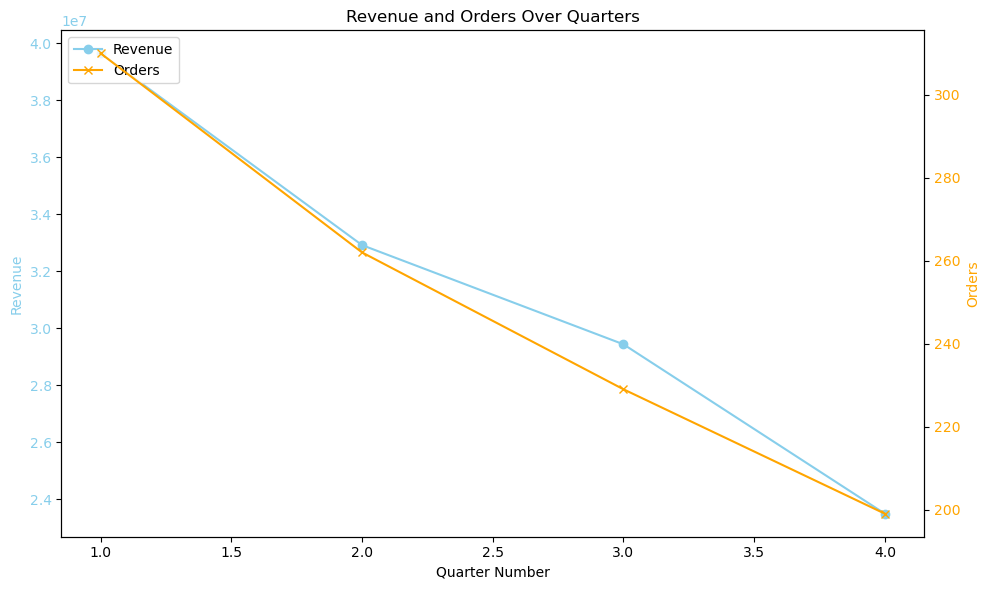

In [10]:
# SQL query to retrieve the sum of revenue and count of orders for each quarter
sql_query = """
    SELECT 
        quarter_number,
        ROUND(SUM(quantity*vehicle_price), 0) AS revenue,
        COUNT(order_id) AS total_order
    FROM 
        order_t
    GROUP BY 
        quarter_number
    ORDER BY 
        quarter_number;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Creating a dual-axis line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Revenue on the primary y-axis (left)
ax1.plot(df['quarter_number'], df['revenue'], color='skyblue', marker='o', label='Revenue')
ax1.set_xlabel('Quarter Number')
ax1.set_ylabel('Revenue', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Revenue and Orders Over Quarters')

# Creating a secondary y-axis (right) for Orders
ax2 = ax1.twinx()
ax2.plot(df['quarter_number'], df['total_order'], color='orange', marker='x', label='Orders')
ax2.set_ylabel('Orders', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Displaying legend for both y-axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\943847861.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


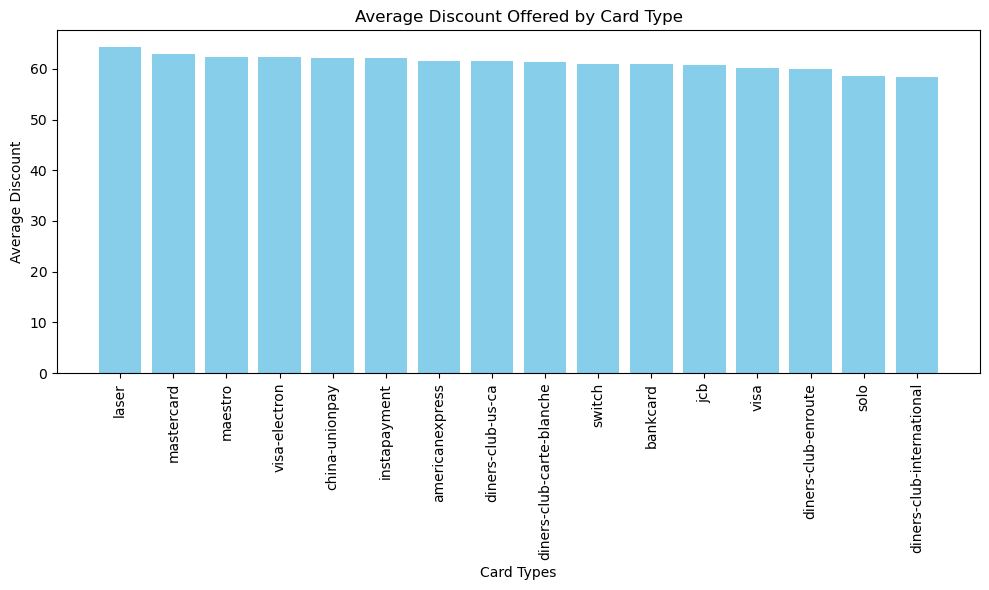

In [11]:
# SQL query to calculate the average discount for each card type
sql_query = """
    SELECT 
        credit_card_type,
        ROUND(AVG(discount) * 100, 2) AS average_discount
    FROM 
        order_t t1
    INNER JOIN customer_t t2
        ON t1.customer_id = t2.customer_id
    GROUP BY 
        credit_card_type
    ORDER BY 
        average_discount DESC;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['credit_card_type'], df['average_discount'], color='skyblue')
plt.xlabel('Card Types')
plt.ylabel('Average Discount')
plt.title('Average Discount Offered by Card Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Bhavya Govindrao\AppData\Local\Temp\ipykernel_16640\1533442594.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


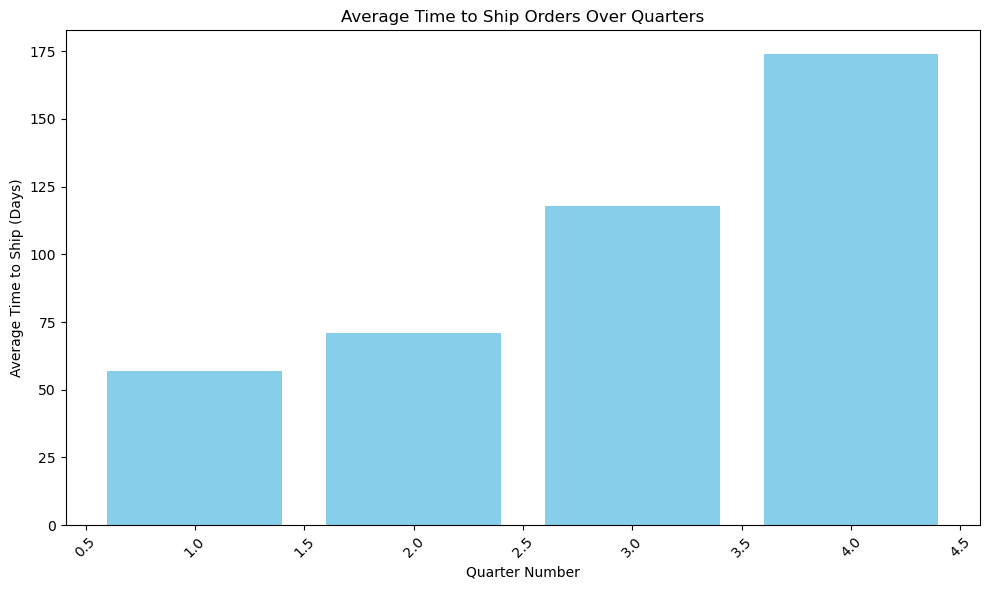

In [12]:
# SQL query to retrieve the average time to ship orders by quarter
sql_query = """
    SELECT 
        quarter_number,
        ROUND(AVG(DATEDIFF(ship_date, order_date)), 0) AS average_shipping_time
    FROM 
        order_t
    GROUP BY 
        quarter_number
    ORDER BY 
        quarter_number;
"""

# Read SQL results into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['quarter_number'], df['average_shipping_time'], color='skyblue')
plt.xlabel('Quarter Number')
plt.ylabel('Average Time to Ship (Days)')
plt.title('Average Time to Ship Orders Over Quarters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Closing connection
conn.close()